# Práctica 4: Regresión logística regularizada.

Greta y Héloïse

Grupo 2

## Leer el contenido del archivo

In [299]:
import numpy as np
from pandas.io.parsers import read_csv
import sklearn.preprocessing as sk
import matplotlib.pyplot as plt
import numpy as np

In [300]:
datos = read_csv("data4.csv", header=None).to_numpy()
print(datos.shape)
#print(datos[:10])

(118, 3)


# Visualización de los datos

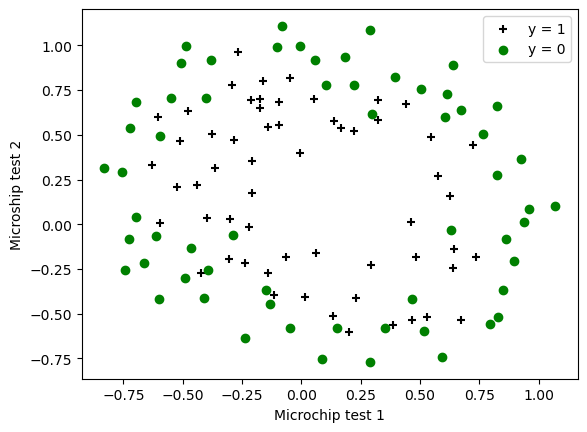

In [301]:
# Los datos
X=datos[:,:-1]
Y=datos[:,-1]
# Obtiene un vector con los indices de los ejemplos positivos
pos1 = np.where(Y == 1 )
pos0 = np.where(Y == 0 )
# Dibuja los ejemplos positivos
plt.scatter (X[pos1,0], X[pos1,1], marker='+', c='k', label="y = 1")
plt.scatter (X[pos0,0], X[pos0,1], marker='o', c='green', label="y = 0")
plt.xlabel("Microchip test 1")
plt.ylabel("Microship test 2")
plt.legend();


## Función sigmoide

In [302]:
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

## Normalizacion

In [303]:
def normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

## Mapeo de los atributos

In [304]:
def mapFeature(X):
    poly = sk.PolynomialFeatures(6)
    X = poly.fit_transform(X)
    return X

print('Shape of X', np.shape(mapFeature(X)))    

Shape of X (118, 28)


## Cálculo de la función de regularizada coste y su gradiente

In [377]:
def cost(x,y,w,b,lamb):
    m = len(y)
    f_wb = sigmoide(np.dot(x,w)+b)
    term1 = np.dot(-y, np.log(f_wb))
    term2 = np.dot((1 - y), np.log(1 - f_wb))
    term_regu = (lamb / (2 * m)) * np.sum(np.square(w))
    J = (np.sum(term1 - term2)  / m) + term_regu
    
    gradW = (1/m) * np.dot((f_wb - y),x) + (lamb/m)*w
    gradB = np.sum((f_wb - Y)) / m
    return J, gradW, gradB


## Método de descenso de gradiente

In [378]:
def gradient_descent(data, alpha, max_iter, lamb):
    X, Y = normalize(data[:, :-1])[0],data[:, -1]
    X = mapFeature(X)
    m,n = np.shape(X)
    w, tmp_w = np.zeros(n), np.zeros(n)
    b = 0
    J_history = []
    
    for iter in range(max_iter):
        dJ_w, dJ_b = cost(X, Y, w, b,lamb)[1], cost(X, Y, w, b,lamb)[2]
        tmp_w = w - alpha * dJ_w
        tmp_b = b - alpha * dJ_b
        w, b = tmp_w, tmp_b
        J_history.append(cost(X, Y, w, b, lamb)[0]) 
    return w, b, J_history


# Cálculo del valor óptimo de los parámetros y efectos de la regularización

In [382]:
# Verify points
X, Y = normalize(datos[:, :-1])[0],datos[:, -1]
X = mapFeature(X)
m,n = np.shape(X)
w = np.zeros(n)
print('The cost with w = [0,0,...,0] and b = 0 and lambda = 0, is:', cost(X, Y, w, 0,0)[0])


The cost with w = [0,0,...,0] and b = 0 and lambda = 0, is: 0.6931471805599453


----------------------------------------------------------------------------------------------------

 The accuracy of the classifier for λ =  0  is of  82.20 % -> No regularization (Overfitting) 


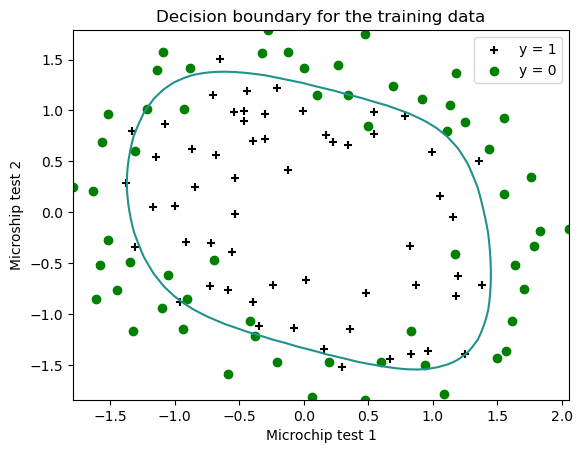

----------------------------------------------------------------------------------------------------

 The accuracy of the classifier for λ =  1  is of  82.20 % -> Training data with decision boundary 


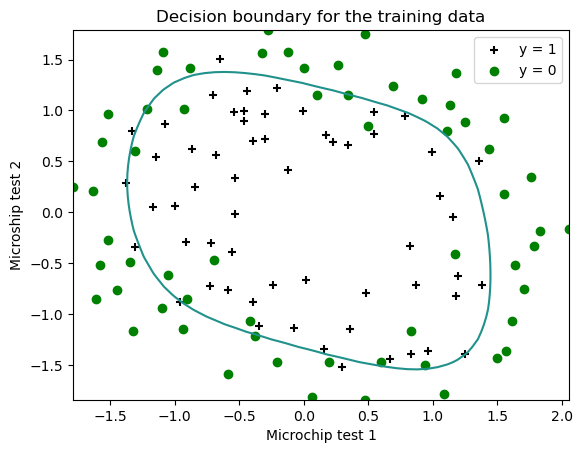

----------------------------------------------------------------------------------------------------

 The accuracy of the classifier for λ =  100  is of  83.05 % -> Too much regularization (Underfitting) 


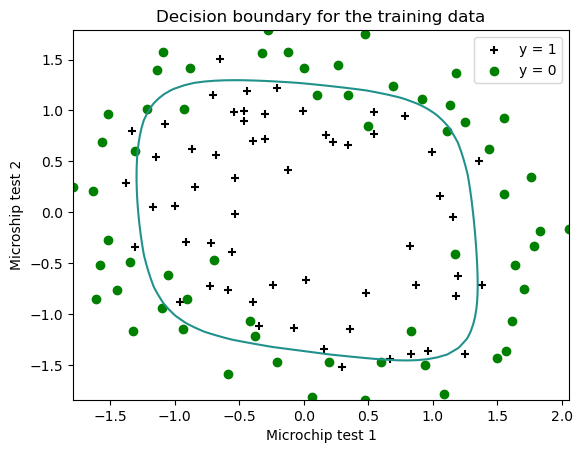

In [380]:
# Evaluate the optimal for different λ

cases = {"No regularization (Overfitting) ": 0,
         "Training data with decision boundary ": 1,
         "Too much regularization (Underfitting) ": 100}

# Accuracy
def accuracy(X, y, w, b, cutoff):
    pred = [sigmoide(np.dot(X, w) + b) >= cutoff]
    acc = np.mean(pred == y)
    return (acc * 100)

for k, lamb in cases.items():
    
    # Gradient Descent Method
    learning_rate, max_iter = 0.001, 10000
    w_min, b_min, J_history_min = gradient_descent(datos, learning_rate, max_iter, lamb)

    # Accuracy of the logistic regularized regression
    X, Y = normalize(datos[:, :-1])[0],datos[:, -1]
    X = mapFeature(X)
    porcentage = accuracy(X, Y, w_min, b_min, 0.5)
    print(100 * "-")
    print('\n The accuracy of the classifier for λ = ', lamb, ' is of ', "%.2f" % porcentage, '% ->', k)
    
    # Plot the normalized data
    X, Y = normalize(datos[:, :-1])[0],datos[:, -1]
    pos1, pos0 = np.where(Y == 1 ), np.where(Y == 0 )
    plt.scatter (X[pos1,0], X[pos1,1], marker='+', c='k', label="y = 1")
    plt.scatter (X[pos0,0], X[pos0,1], marker='o', c='green', label="y = 0")
    
    # Plot the decision boundary
    x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 50)
    x2 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 50)
    xx1, xx2 = np.meshgrid(x1,x2)
    z = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            tmp=np.array([[xx1[i,j],xx2[i,j]]])
            z[i,j] = np.dot(mapFeature(tmp), w_min) + b_min
    
    plt.contour(x1,x2,z,0)
    plt.title('Decision boundary for the training data')
    plt.xlabel("Microchip test 1")
    plt.ylabel("Microship test 2")
    plt.legend();
    plt.show()
